accuracy： 
 0.7619047619047619
depth： 4


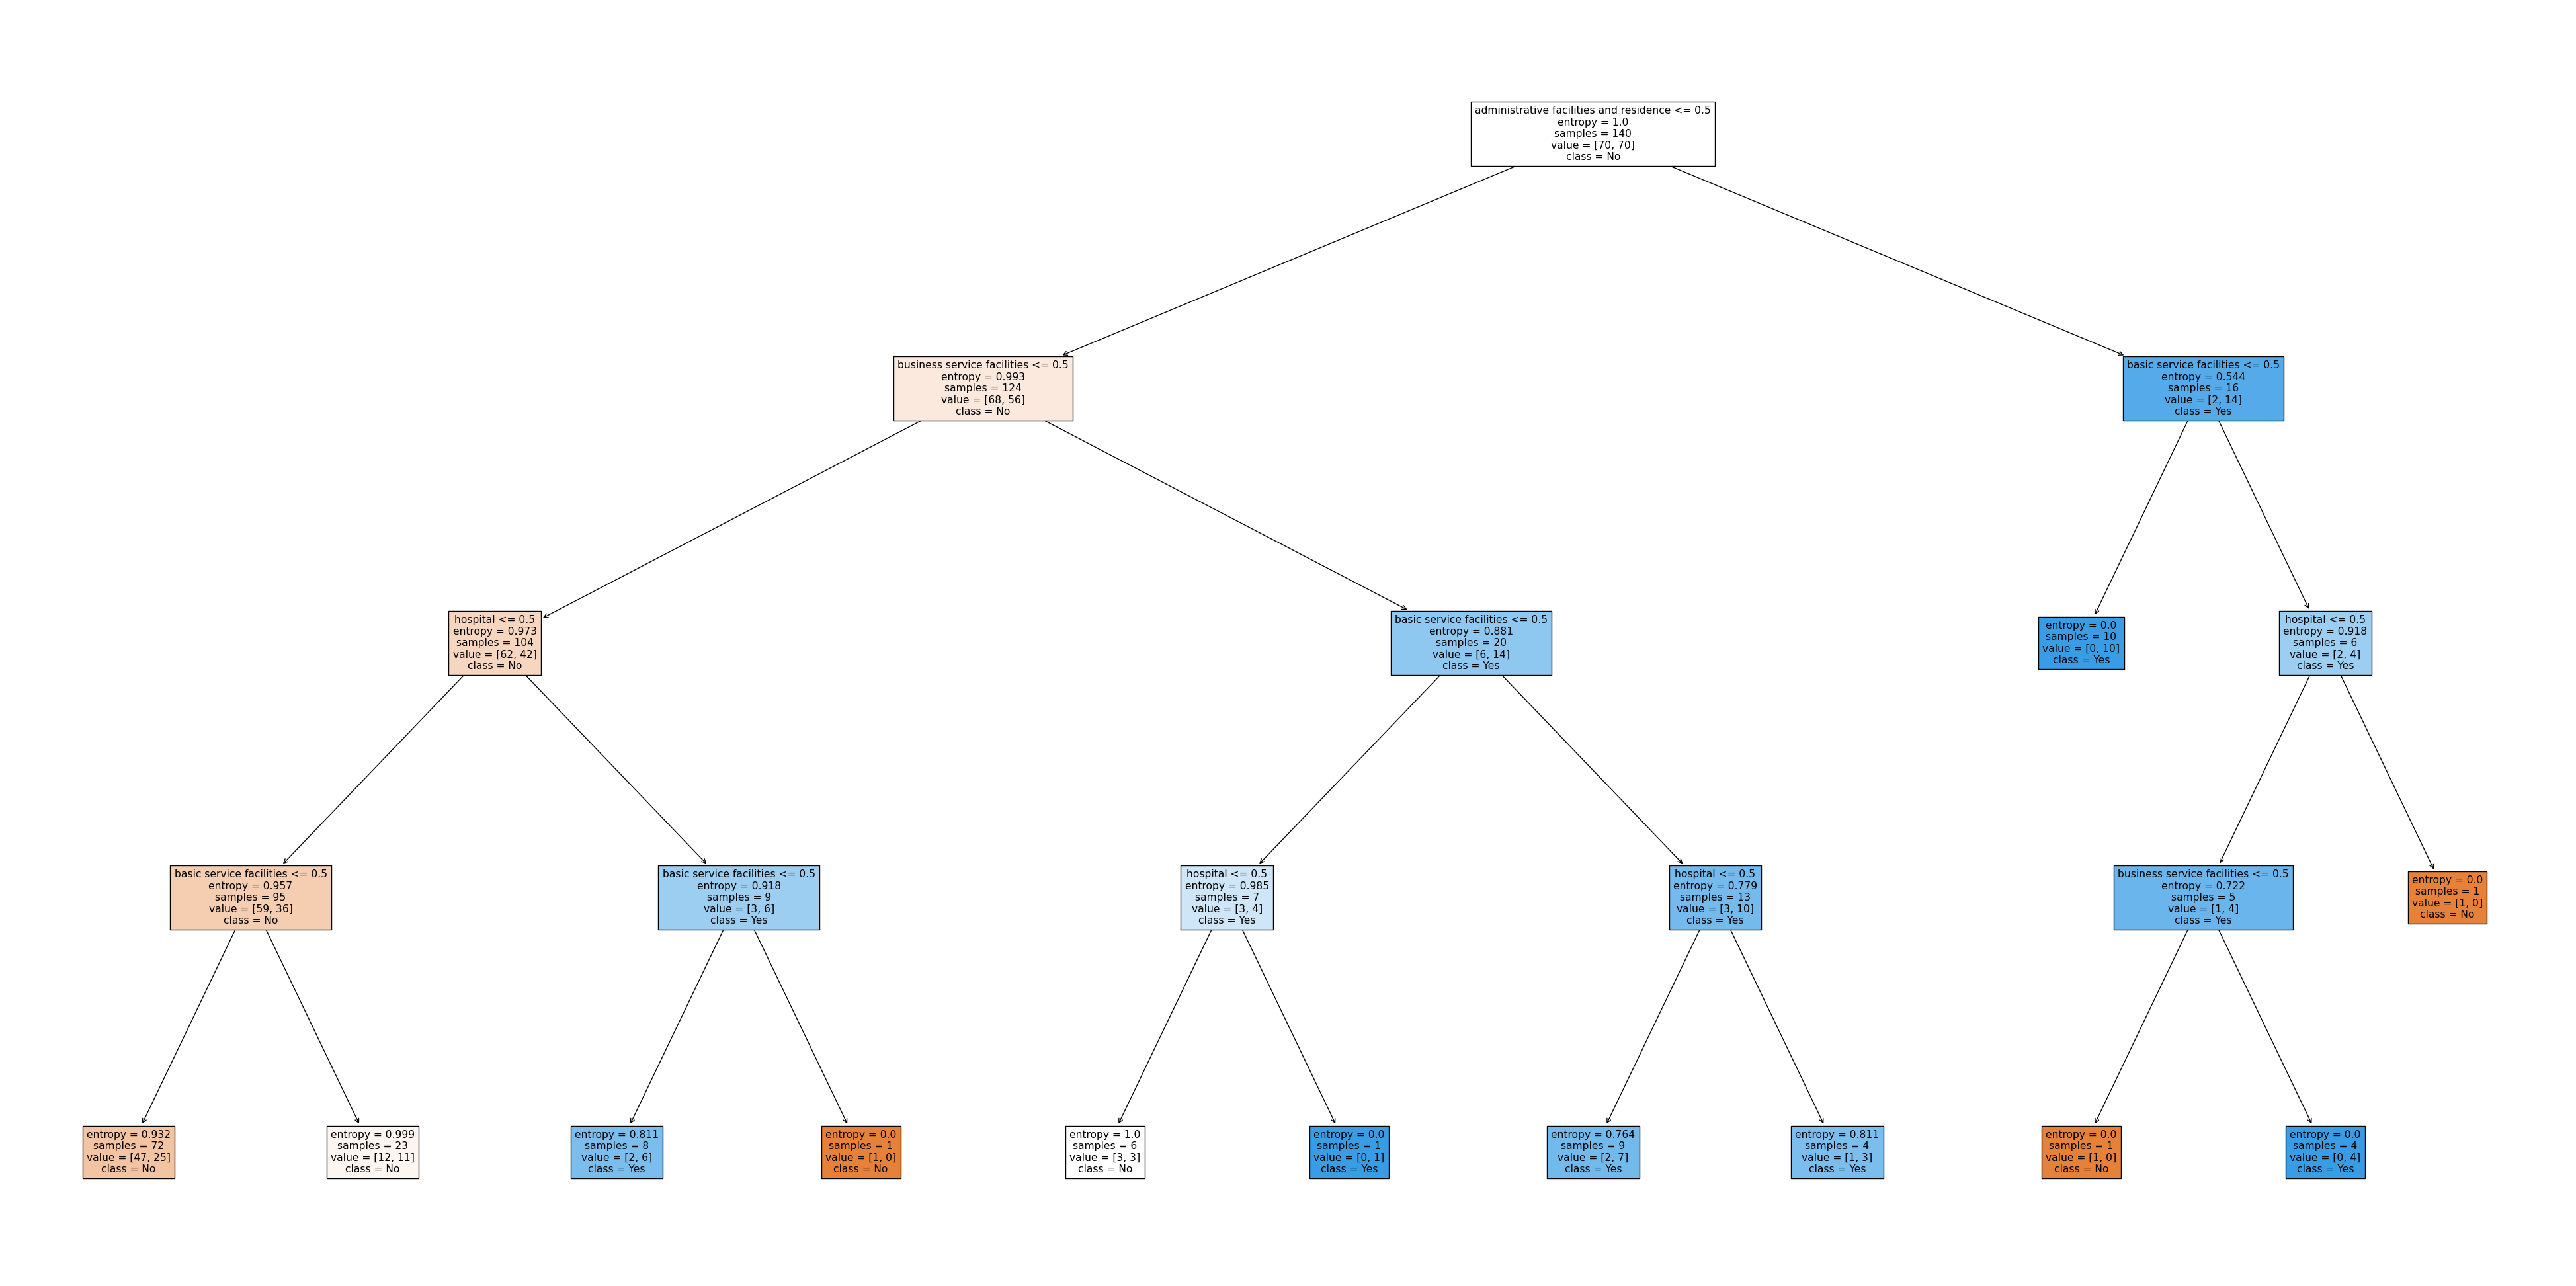

In [1]:
# Decision tree based on ID3 algorithm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


London = pd.read_csv('input.csv')

x = London[["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"]]
y = London["old people's home"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.7, test_size=0.3)

model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20)
model.fit(x, y)
score=model.score(x_test, y_test)
print("accuracy： \n", score)
depth = model.get_depth()
print("depth：", depth)

plt.figure(figsize=(50, 25))
plot_tree(model, filled=True, feature_names=["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"], class_names=["No", "Yes"])
plt.show()

In [2]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, random_state=22)
rf_model.fit(x_train, y_train)
rf_y_predict = rf_model.predict(x_test)
rf_score=rf_model.score(x_test, y_test)
print("accuracy： \n", rf_score)

accuracy： 
 0.7380952380952381


In [3]:
# Prediction
import joblib
joblib.dump(model, "decisiontree.pkl")
London2=pd.read_csv('class2.csv')
model = joblib.load("decisiontree.pkl")
x_train1 = London2[["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"]]
london_predict = model.predict(x_train1)
London2.insert(6, 'result', value = london_predict)
London2.to_csv("london_result.csv")

optimal parameter: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
score of optimal parameter: 0.6010526315789473
accuracy： 
 0.7142857142857143
accuracy： 
 0.7380952380952381


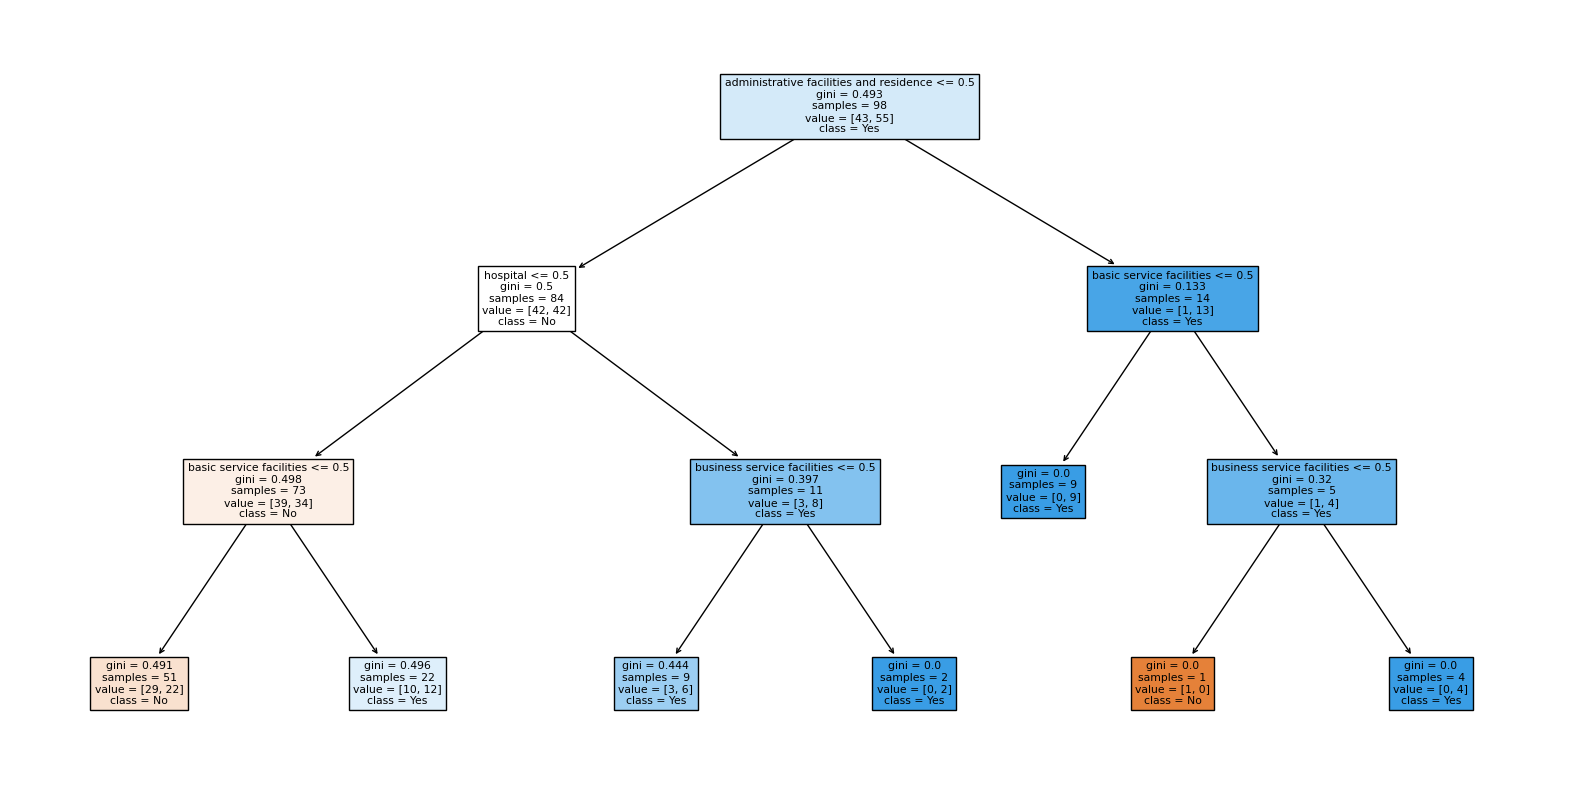

In [4]:
# Optimal parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 21), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 5)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=20), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"optimal parameter: {grid_search.best_params_}")
print(f"score of optimal parameter: {grid_search.best_score_}")

optimal_params = grid_search.best_params_
op_model = DecisionTreeClassifier(**optimal_params, random_state=20)
op_model.fit(x_train, y_train)
score=op_model.score(x_test, y_test)
print("accuracy： \n", score)

op_rf_model = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=10, random_state=22)
op_rf_model.fit(x_train, y_train)
op_rf_y_predict = op_rf_model.predict(x_test)
op_rf_score=op_rf_model.score(x_test, y_test)
print("accuracy： \n", op_rf_score)

plt.figure(figsize=(20, 10))
plot_tree(op_model, filled=True, feature_names=["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital"], class_names=["No", "Yes"])
plt.show()

accuracy： 
 0.6904761904761905
depth： 5


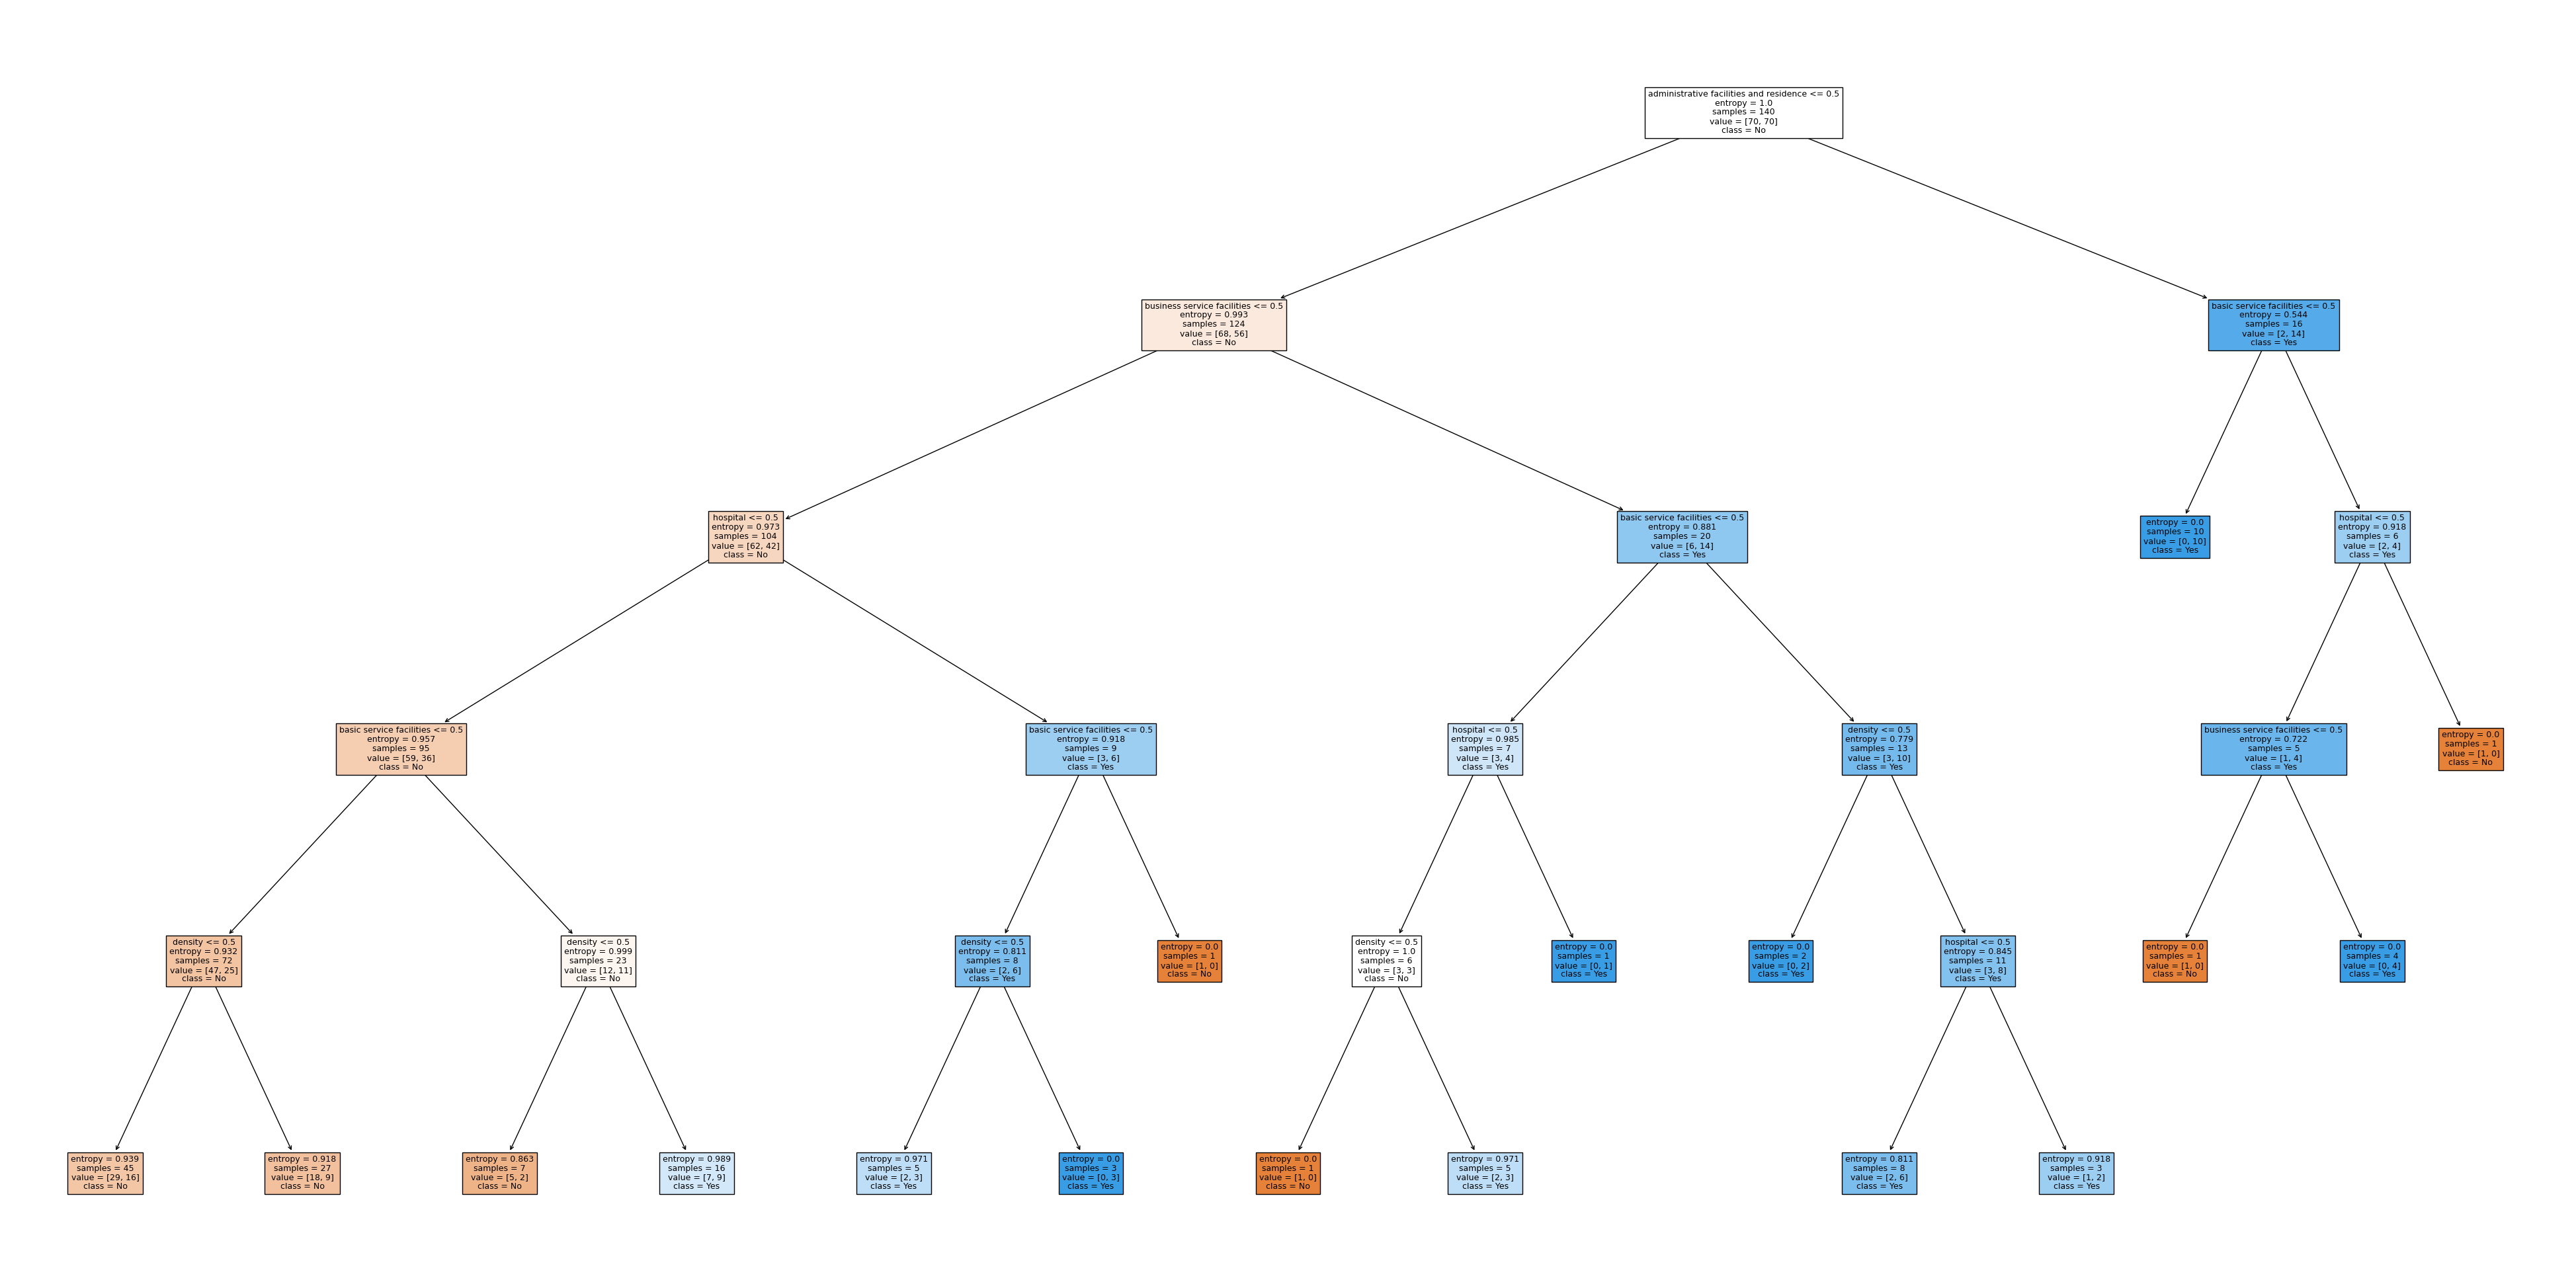

In [5]:
# Involving density of old people
London1 = pd.read_csv('input1.csv')

x = London1[["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital", "density"]]
y = London1["old people's home"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=22, train_size=0.7, test_size=0.3)

model2 = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20)
model2.fit(x, y)
score=model2.score(x_test, y_test)
print("accuracy： \n", score)
depth = model2.get_depth() 
print("depth：", depth)

plt.figure(figsize=(50, 25))
plot_tree(model2, filled=True, feature_names=["basic service facilities", "business service facilities", "administrative facilities and residence", "hospital", "density"], class_names=["No", "Yes"])
plt.show()

                                    feature  perturb_percentage  accuracy
0                  basic service facilities                 0.1  0.580952
1                  basic service facilities                 0.2  0.571429
2                  basic service facilities                 0.3  0.571429
3               business service facilities                 0.1  0.550000
4               business service facilities                 0.2  0.564286
5               business service facilities                 0.3  0.566667
6   administrative facilities and residence                 0.1  0.571429
7   administrative facilities and residence                 0.2  0.557143
8   administrative facilities and residence                 0.3  0.571429
9                                  medicine                 0.1  0.566667
10                                 medicine                 0.2  0.559524
11                                 medicine                 0.3  0.535714


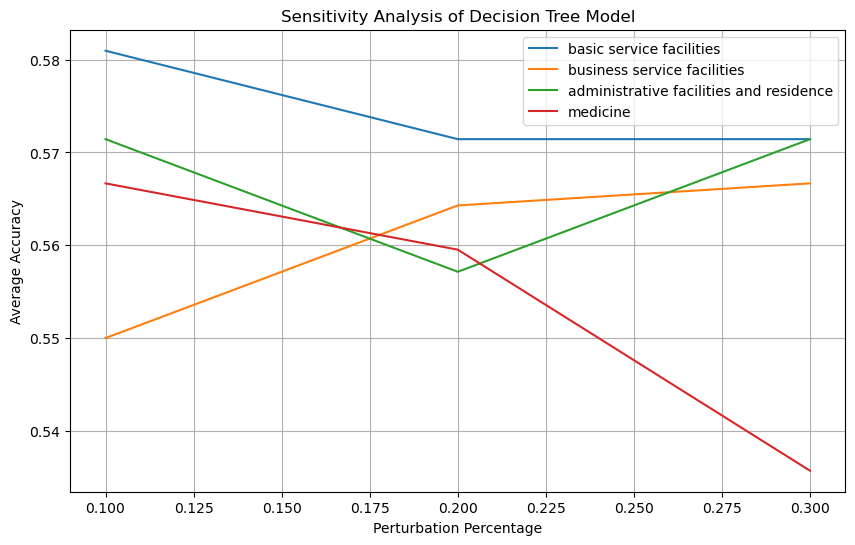

In [6]:
# Sensitivity analysis
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(42)

London = pd.read_csv('input2.csv')

features = ["basic service facilities", "business service facilities", "administrative facilities and residence", "medicine"]
target = "old people's home"
x = London[features]
y = London[target]

def perturb_and_evaluate(data, target, feature_name, perturb_percentage, n_iterations=10):
    accuracies = []
    for _ in range(n_iterations):
        
        data_perturbed = data.copy()
        perturb_count = int(len(data_perturbed) * perturb_percentage)
        indices_to_perturb = np.random.choice(data_perturbed.index, size=perturb_count, replace=False)
        
        perturbation = np.random.normal(loc=0.0, scale=1.0, size=perturb_count)
        data_perturbed.loc[indices_to_perturb, feature_name] += perturbation

        x_train, x_test, y_train, y_test = train_test_split(data_perturbed[features], data_perturbed[target], random_state=22, train_size=0.7, test_size=0.3)
        
        model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=20)
        model.fit(x_train, y_train)
        
        y_pred = model.predict(x_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    return np.mean(accuracies)

results = {'feature': [], 'perturb_percentage': [], 'accuracy': []}
perturb_percentages = [0.1, 0.2, 0.3]  

for feature in features:
    for perturb_percentage in perturb_percentages:
        avg_accuracy = perturb_and_evaluate(London, target, feature, perturb_percentage)
        results['feature'].append(feature)
        results['perturb_percentage'].append(perturb_percentage)
        results['accuracy'].append(avg_accuracy)

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 6))
for feature in features:
    subset = results_df[results_df['feature'] == feature]
    plt.plot(subset['perturb_percentage'], subset['accuracy'], label=feature)

plt.xlabel('Perturbation Percentage')
plt.ylabel('Average Accuracy')
plt.title('Sensitivity Analysis of Decision Tree Model')
plt.legend()
plt.grid(True)
plt.show()